In [175]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [177]:
data = pd.read_csv('insurance.csv')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [181]:
data = data.dropna()

In [183]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [185]:
sns.set_theme(rc={'figure.figsize':(8,8)})

<Axes: xlabel='age', ylabel='charges'>

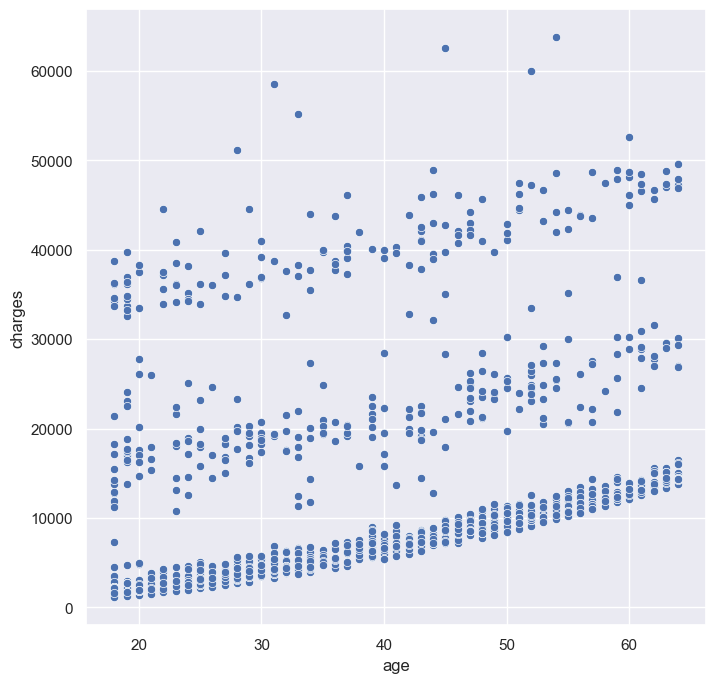

In [187]:
# How is age related to medical costs?
sns.scatterplot(data=data, x='age', y='charges')

Age is related to medical cost with an increase in age also correlates to an increase in medical charges. In the scatter plot above we can see a upward trend where the lowest medical cost slowly increase as age increases. 

<Axes: xlabel='children', ylabel='charges'>

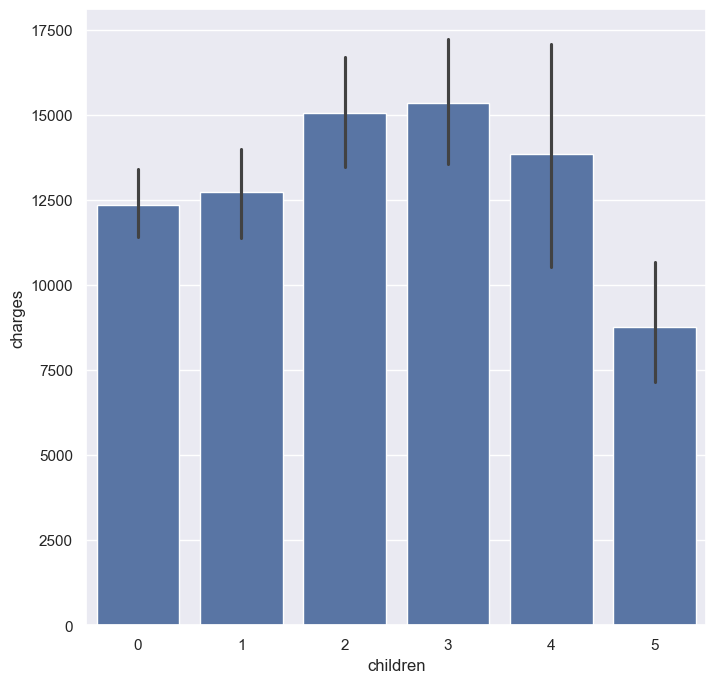

In [190]:
# How is number of children related to medical costs?
sns.barplot(data=data, x='children', y='charges')

There is a correlation between children and medical cost but the relationship is weak. There is an increase in medical charges from 0 to 3 children but then the medical cost start to decline at 4 and 5 children. With 5 being the lowest with medical charges.

In [193]:
# How is the number of people distributed by region?
data['region'].value_counts(ascending=True)

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

The number of people distributed by region is evenly distrubted in northeast, southwest, and northwest regions. Southeast having the most amount of people.

In [196]:
# How is the number of people distributed by age?
data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

The number for age is distributed with 18 and 19 year olds being the the highest count. All ages from 20 through 64 have the same amount around 29-22 range. 

<Axes: xlabel='charges', ylabel='Count'>

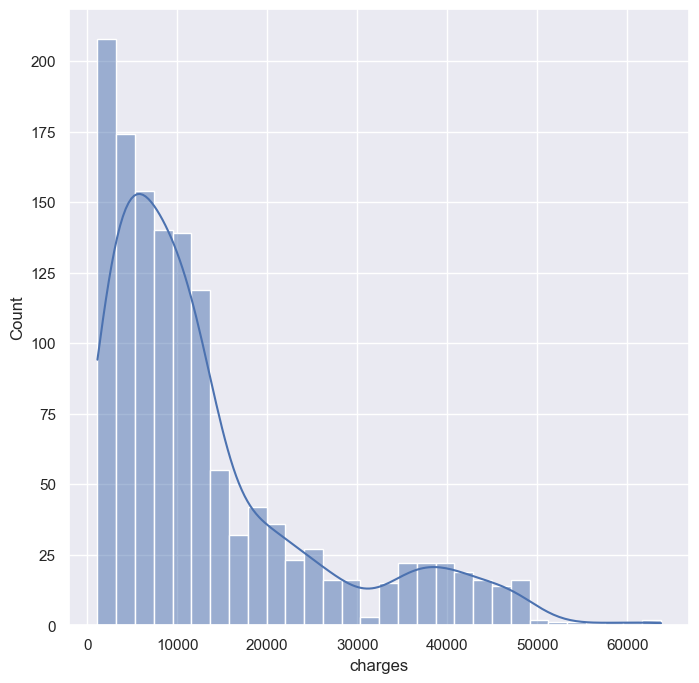

In [199]:
# How are the charges distributed?
sns.histplot(data['charges'], kde=True)

In [201]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

The median charge is 9,382, which is lower than the mean of 13,270, confirming the influence of high cost outliers. Most charges fall between 4,700 and 16,600. However, the maximum charge exceeds 63,000, revealing the presence of substantial outliers and wide costs. Overall, the data shows that medical charges are unevenly distributed.

In [204]:
# Bin the BMI column. To do that, search the internet to determine how you should bin and label the data.
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity 1','Obesity 2','Obesity 3']

data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

In [206]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity 1
2,28,male,33.000,3,no,southeast,4449.46200,Obesity 1
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


<Axes: xlabel='bmi', ylabel='charges'>

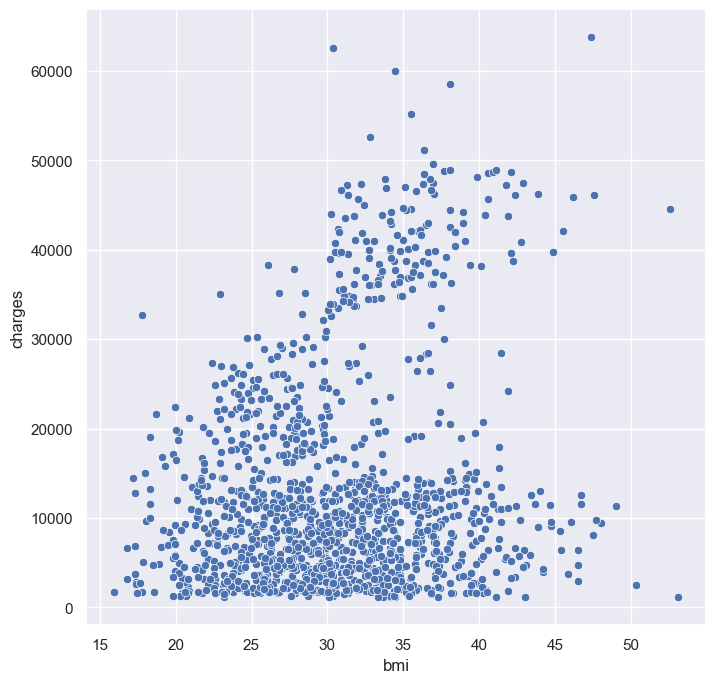

In [208]:
# How are the charges related to the BMI?
sns.scatterplot(data=data, x='bmi', y='charges')

<Axes: xlabel='bmi_category', ylabel='charges'>

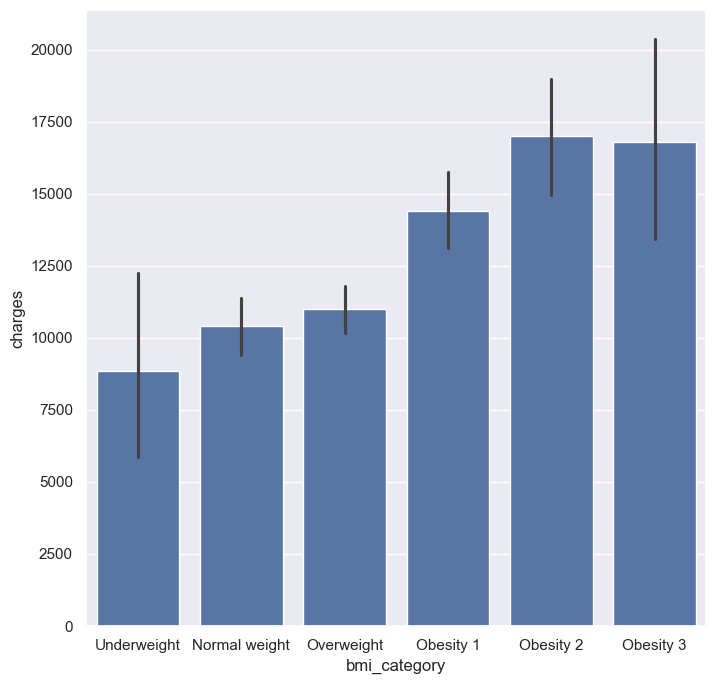

In [210]:
sns.barplot(data=data, x='bmi_category', y='charges')

Charges tend to increase with BMI, but the relationship is relatively weak when BMI is considered on its own. Overall, BMI has a positive but limited ability to predict medical charges unless combined with other factors such as smoking status.

<Axes: xlabel='smoker', ylabel='charges'>

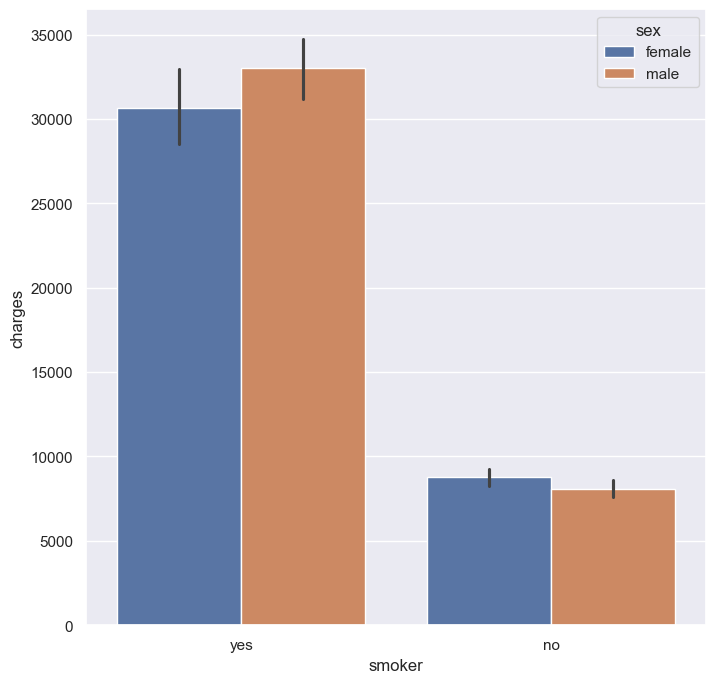

In [213]:
# How is the smoker status related to the charges?
sns.barplot(data=data, x='smoker', y='charges', hue='sex')

The smoker status has a high correlation with medical charges. Smokers tend to pay more than non-smokers on medical charges.

<Axes: xlabel='region', ylabel='charges'>

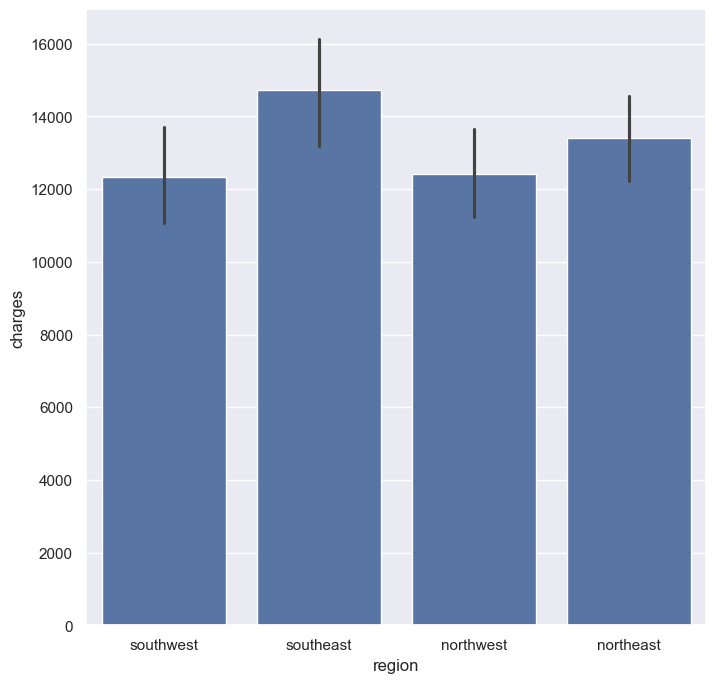

In [216]:
# How are the charges related to the region?
sns.barplot(data=data, x='region', y='charges')

Medical cost realtionship with region has no correlation. Southeast has more charges but that's because the southeast region has more people in the data compared to the others. 

<Axes: xlabel='region', ylabel='bmi'>

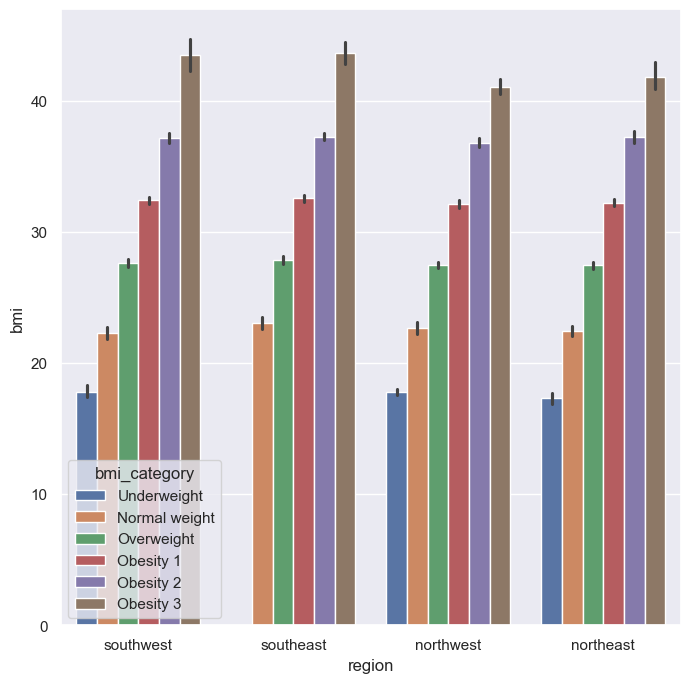

In [219]:
# Which region has the highest obesity percentage?
sns.barplot(data=data, x='region', y='bmi', hue='bmi_category')

From the chart above we can see that southeast and southwest have around the same percantage of obesity but we do have to take into account that southeast has more people in the data compared to southwest. I would say that southwest has a higher percentage even though it has a lower count of people.

In [222]:
# Create a simple regression to show the relationship between charges and age.
X = data[['age']]   
y = data['charges']   

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
print("R-squared:", r2)

R-squared: 0.08940589967885804


The simple regression tells us that age alone is a weak predictor of charges.

In [229]:
# How does this relationship change with smoking status?
data['smoker_binary'] = data['smoker'].map({'yes': 1, 'no': 0})

X = data[['smoker_binary']]
y = data['charges']

model = LinearRegression().fit(X, y)

r2 = model.score(X, y)

print("R²:", r2)

R²: 0.6197648148218988


The simple regression tells us that smokers status alone is a strong predictor of charges.

In [231]:
# How does this relationship change with BMI?
X = data[['bmi']]   
y = data['charges']   

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)
print("R-squared:", r2)

R-squared: 0.03933913991786253


The simple regression tells us that bmi is a weak predictor of charges.

In [240]:
# Create a multiple regression model to predict charges. To do that, you’ll need to dummy encode and rescale the data.
# Make predictions with your multiple regression model and evaluate how well your model is working.
# What is the optimal number of parameters for the multiple regression?
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('charges', axis=1)
y = data['charges']

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numeric_features), ('cat', OneHotEncoder(drop='first'), categorical_features)])

model = Pipeline(steps=[('preprocess', preprocessor), ('regression', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print("R-squared:", r2)

R-squared: 0.7835929767120722


The multiple regression model produced an R² value of 0.78, meaning the model explains approximately 78% of the variation in insurance charges. This represents a strong predictive relationship. By incorporating both numeric variables and dummy-encoded categorical variables, the model captures the primary factors that drive healthcare costs. Smoking status contributes the largest effect, but the additional variables improve the model's predictive power and overall fit.